<a href="https://colab.research.google.com/github/vinay10949/AnalyticsAndML/blob/master/3_2_Gaussian_transformation_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gaussian Transformation with Scikit-learn

Scikit-learn has recently released transformers to do Gaussian mappings as they call the variable transformations. The PowerTransformer allows to do Box-Cox and Yeo-Johnson transformation. With the FunctionTransformer, we can specify any function we want.

The transformers per se, do not allow to select columns, but we can do so using a third transformer, the ColumnTransformer

Another thing to keep in mind is that Scikit-learn transformers return NumPy arrays, and not dataframes, so we need to be mindful of the order of the columns not to mess up with our features.

## Important

Box-Cox and Yeo-Johnson transformations need to learn their parameters from the data. Therefore, as always, before attempting any transformation it is important to divide the dataset into train and test set.



In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer, PowerTransformer

In [3]:
# load the data

data = pd.read_csv('houseprice_train.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's select the numerical and positive variables in the dataset for this demonstration. As most of the transformations require the variables to be positive.

In [4]:
cols = []

for col in data.columns:

    if data[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        
        if np.sum(np.where(data[col] <= 0, 1, 0)) == 0:  # if the variable is positive
        
            cols.append(col)  # append variable to the list

cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

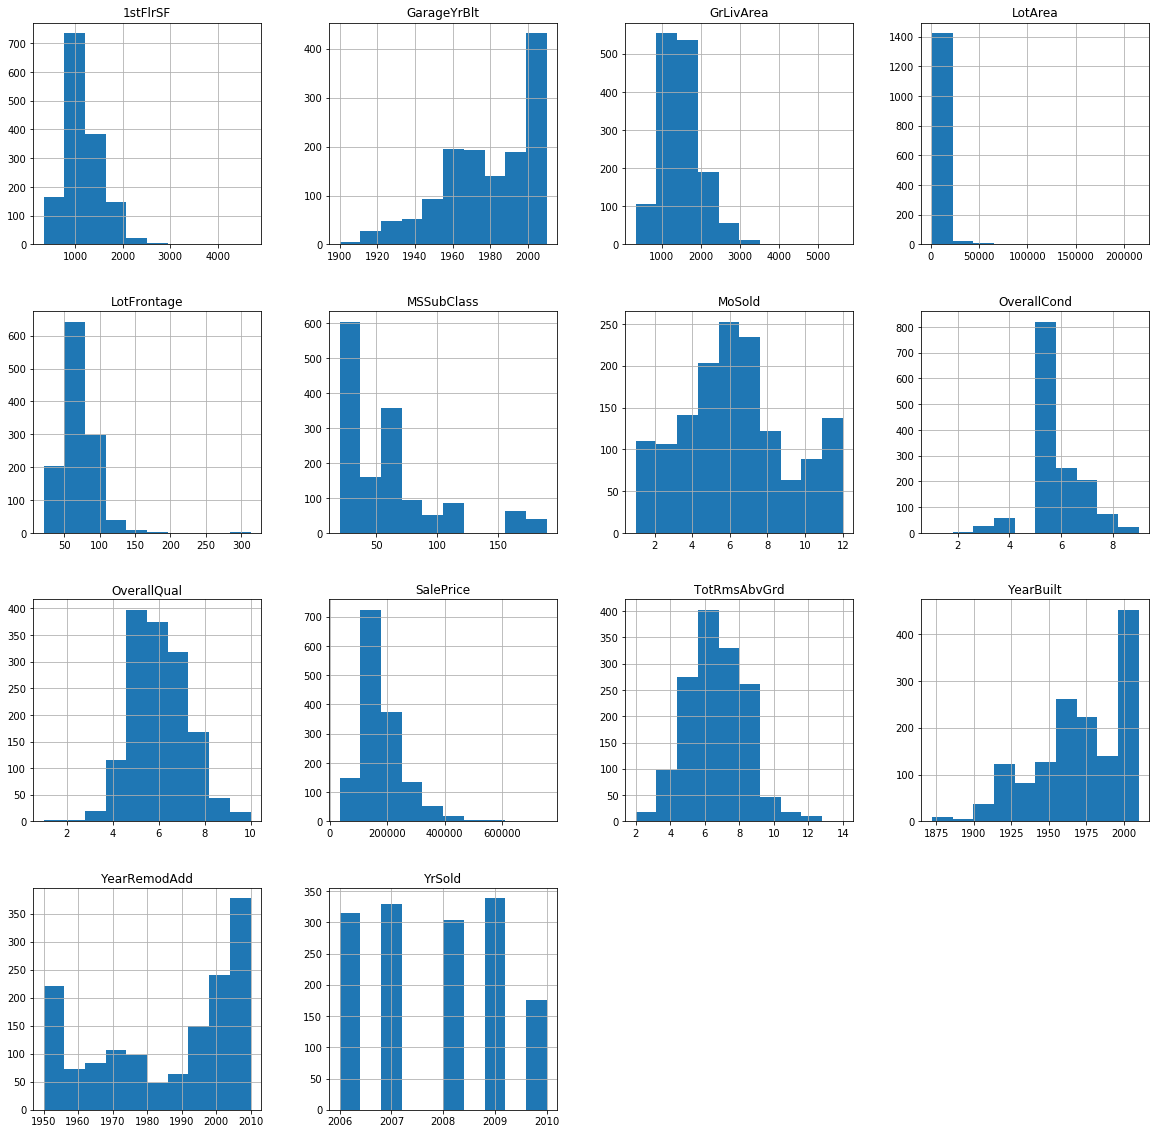

In [5]:
# let's explore the distribution of the numerical variables

data[cols].hist(figsize=(20,20))
plt.show()

## Plots to assess normality

To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles. 

In [0]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

### Logarithmic transformation

In [0]:
# create a log transformer

transformer = FunctionTransformer(np.log, validate=True)

In [0]:
# transform all the numerical and positive variables

data_t = transformer.transform(data[cols].fillna(1))

In [0]:
# Scikit-learn returns NumPy arrays, so capture in dataframe
# note that Scikit-learn will return an array with
# only the columns indicated in cols

data_t = pd.DataFrame(data_t, columns = cols)

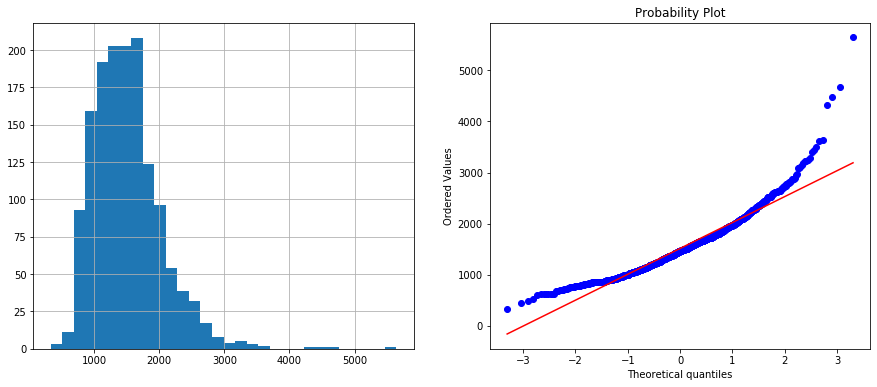

In [11]:
# original distribution

diagnostic_plots(data, 'GrLivArea')

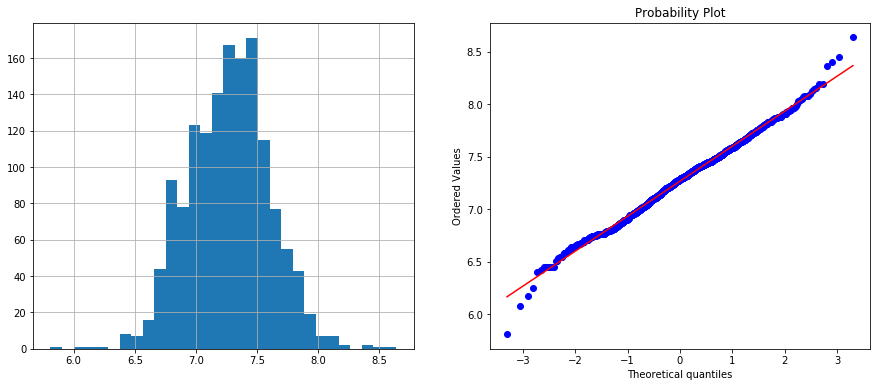

In [12]:
# transformed distribution

diagnostic_plots(data_t, 'GrLivArea')

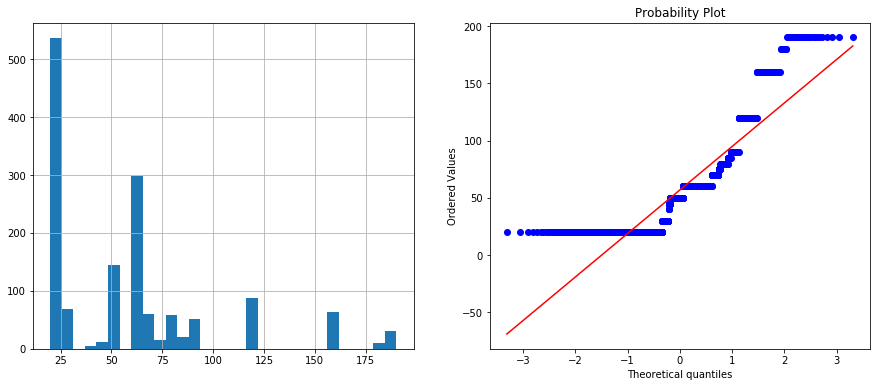

In [13]:
# original distribution

diagnostic_plots(data, 'MSSubClass')

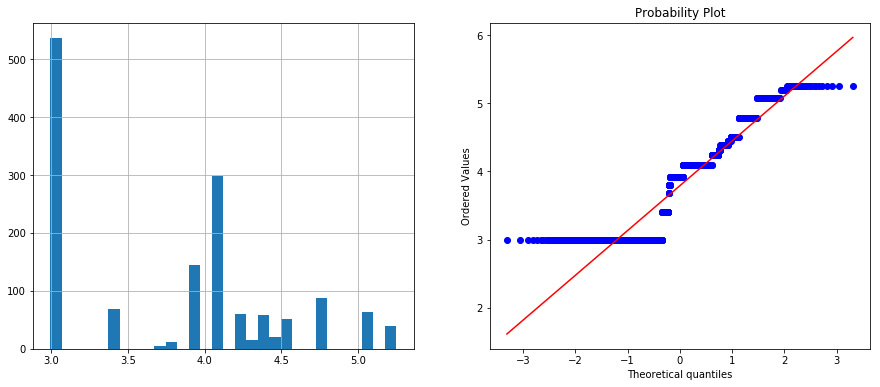

In [0]:
# transformed distribution

diagnostic_plots(data_t, 'MSSubClass')

### Reciprocal transformation

In [0]:
# create the transformer
transformer = FunctionTransformer(lambda x: 1/x, validate=True)

# also
# transformer = FunctionTransformer(np.reciprocal, validate=True)

# transform the positive variables
data_t = transformer.transform(data[cols].fillna(1))

# re-capture in a dataframe
data_t = pd.DataFrame(data_t, columns = cols)

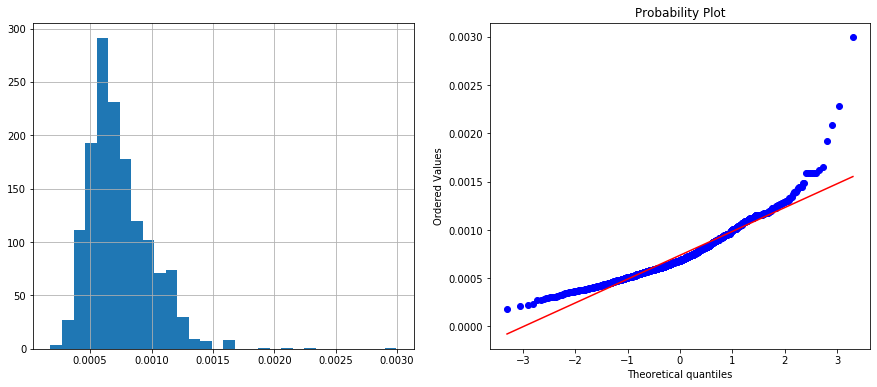

In [16]:
# transformed variable

diagnostic_plots(data_t, 'GrLivArea')

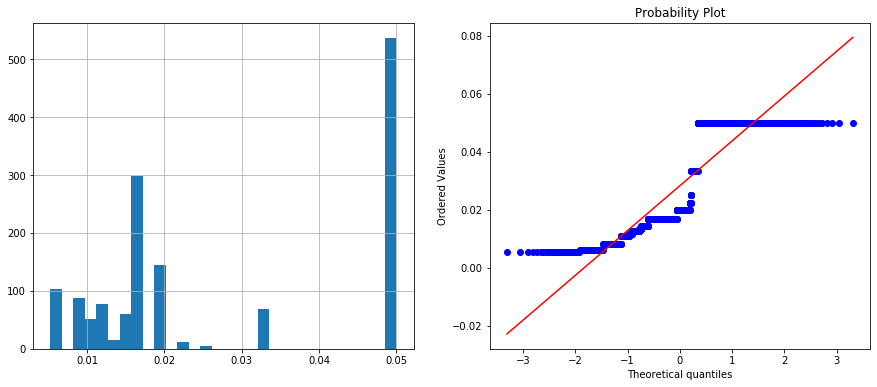

In [17]:
# transformed variable

diagnostic_plots(data_t, 'MSSubClass')

### Square root transformation

In [0]:
transformer = FunctionTransformer(lambda x: x**(1/2), validate=True)

# also
# transformer = FunctionTransformer(np.sqrt, validate=True)

data_t = transformer.transform(data[cols].fillna(1))

data_t = pd.DataFrame(data_t, columns = cols)

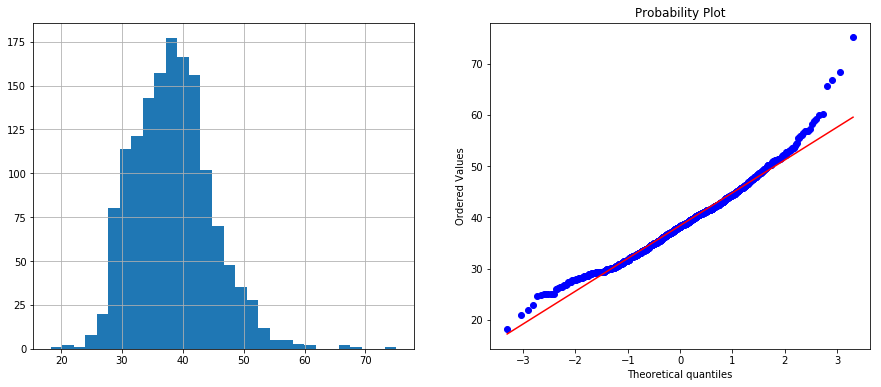

In [0]:
diagnostic_plots(data_t, 'GrLivArea')

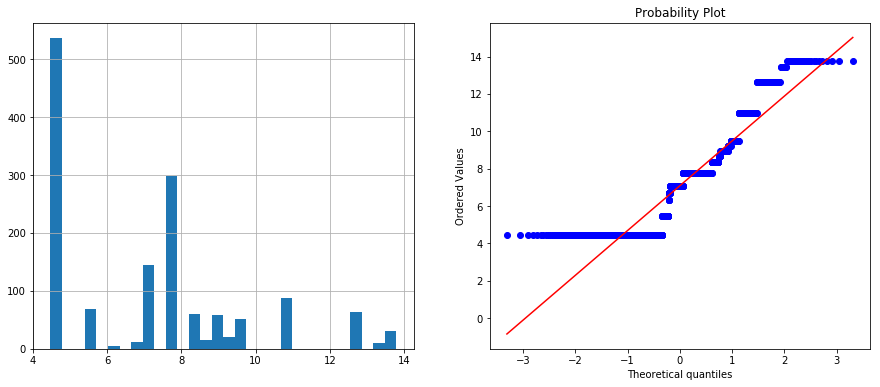

In [0]:
diagnostic_plots(data_t, 'MSSubClass')

### Exponential

In [0]:
transformer = FunctionTransformer(lambda x: x**(1/1.2), validate=True)

data_t = transformer.transform(data[cols].fillna(1))

data_t = pd.DataFrame(data_t, columns = cols)

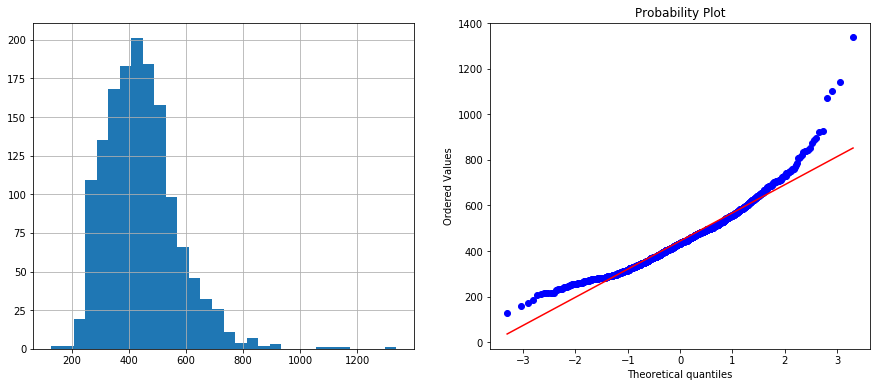

In [19]:
diagnostic_plots(data_t, 'GrLivArea')

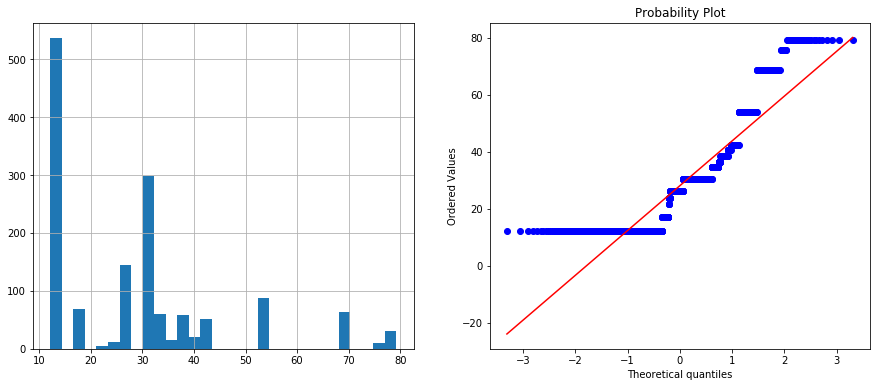

In [0]:
diagnostic_plots(data_t, 'MSSubClass')

### Box-Cox transformation

In [20]:
# create the transformer
transformer = PowerTransformer(method='box-cox', standardize=False)

# find the optimal lambda using the train set
transformer.fit(data[cols].fillna(1))

# transform the data
data_t = transformer.transform(data[cols].fillna(1))

# capture data in a dataframe
data_t = pd.DataFrame(data_t, columns = cols)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)


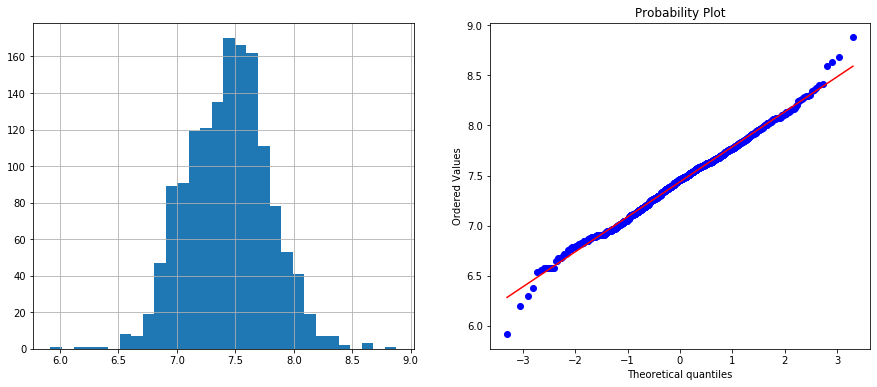

In [21]:
diagnostic_plots(data_t, 'GrLivArea')

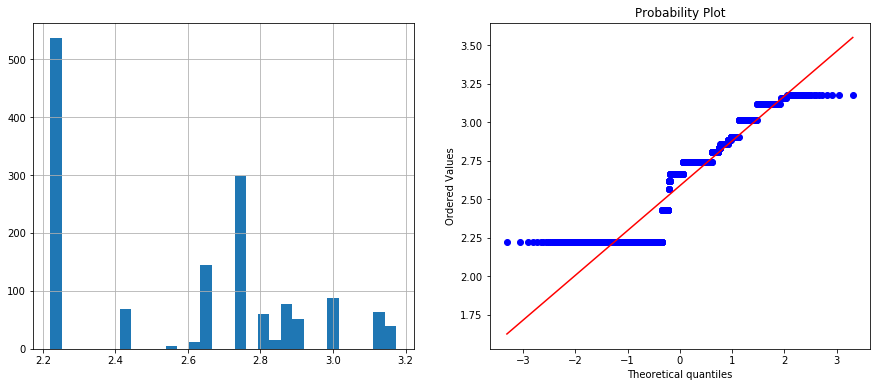

In [22]:
diagnostic_plots(data_t, 'MSSubClass')

### Yeo-Johnson

Yeo-Johnson is an adaptation of Box-Cox that can also be used in negative value variables. So let's expand the list of variables for the demo, to include those that contain zero and negative values as well. 

In [0]:
cols = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'SalePrice'
]

In [0]:
# call the transformer
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# learn the lambda from the train set
transformer.fit(data[cols].fillna(1))

# transform the data
data_t = transformer.transform(data[cols].fillna(1))

# capture data in a dataframe
data_t = pd.DataFrame(data_t, columns = cols)

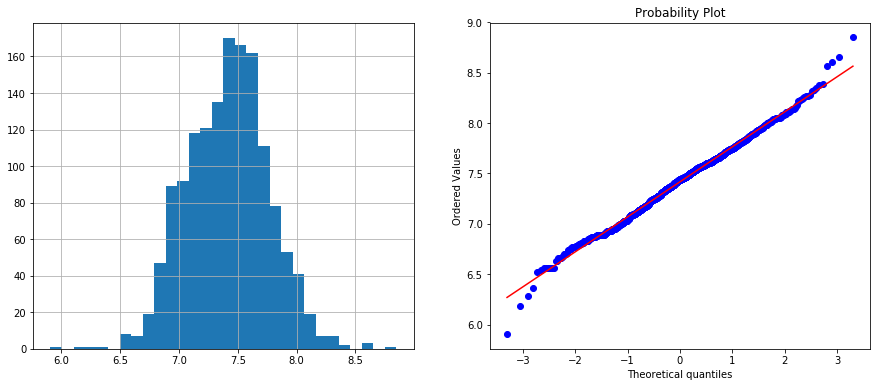

In [0]:
diagnostic_plots(data_t, 'GrLivArea')

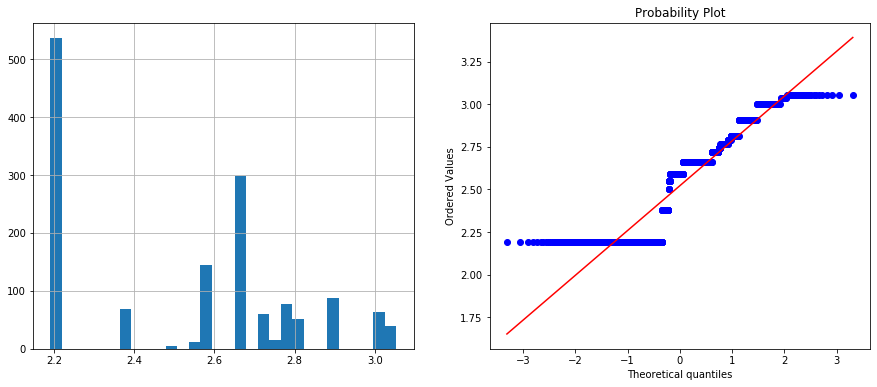

In [25]:
diagnostic_plots(data_t, 'MSSubClass')